# Module 1, Notebook 3: Outline

## Refresher – We Are Focused on Neural Nets  
*"Using a Neural Network"*

- Go to the following link and explore:  
  [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.86675&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

## Neural Net Q&A:

### How Many Hidden Layers Should You Use?  
### How Many Neurons Should You Use?  
### What Happens When You Add More Layers?  

- **Vanishing gradients** – Your network is not working.

### Activation Function

- **Tanh vs. ReLU**
  - Why does tanh sometimes fail?
  - Tanh saturates between 1 and -1.
  - Your numbers need to be in the “goldilocks zone” of tanh.

### Error / Loss Function

- **SKL MLPRegressor** is stuck using least squared error.
  - When does that work?
  - When does it not?

### Solver

- **Which solver to use? Why?**

### Teaching Point

- We don’t want to use a model that is more sophisticated than we need.
- Use the simplest model that works.

### Model Complexity

- **1 neuron** → Linear regression  
- **Nonlinear** → Can improve performance  
- **Big nonlinear** → Risk of overfitting


# Let's build a neural net!

# Summary of How Neural Net Architecture Affects Speed and Accuracy

## Number of Neurons and Layers:

- **More Neurons Per Layer**: Increasing the number of neurons in a layer can capture more complex relationships in data. However, this comes with higher computational costs, leading to slower training times.
- **Deeper Networks (More Layers)**: Adding more hidden layers allows the network to model more complex functions. However, deeper networks can suffer from issues like the vanishing gradient problem, where gradients become very small during backpropagation, slowing down or halting learning in early layers. Deep networks are also prone to overfitting if not properly regularized.

## Activation (Transfer) Function:

- **Tanh (Hyperbolic Tangent)**: Maps inputs to a range of -1 to 1. Tanh saturates when inputs are too large, meaning the gradient becomes very small, leading to slow learning. It's beneficial for outputs centered around zero but can suffer from the vanishing gradient problem.
- **ReLU (Rectified Linear Unit)**: Commonly used due to its simplicity and efficiency, ReLU allows for faster learning as it doesn't saturate like Tanh. However, it can suffer from the "dying ReLU" problem where neurons may stop learning altogether if their outputs fall to zero.

## Error (Loss) Function:

- The error or loss function determines how the performance of the network is evaluated. In regression tasks, **mean squared error (MSE)** is commonly used, while **cross-entropy** is often used for classification problems.
- **Squared Error** is useful for smooth, continuous data but may not perform well for noisy datasets or when outliers are present.

## Solver:

- The choice of the solver impacts the training process. For example, **SGD (Stochastic Gradient Descent)** is useful for large datasets and is computationally inexpensive but may converge slowly. More advanced solvers like **Adam** adapt the learning rate and often result in faster convergence.

## Explore Neural Network Parameters:

To explore these concepts interactively, you can visit the following neural network playground, where you can experiment with network shapes, activation functions, and other parameters:  
[TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.86675&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).


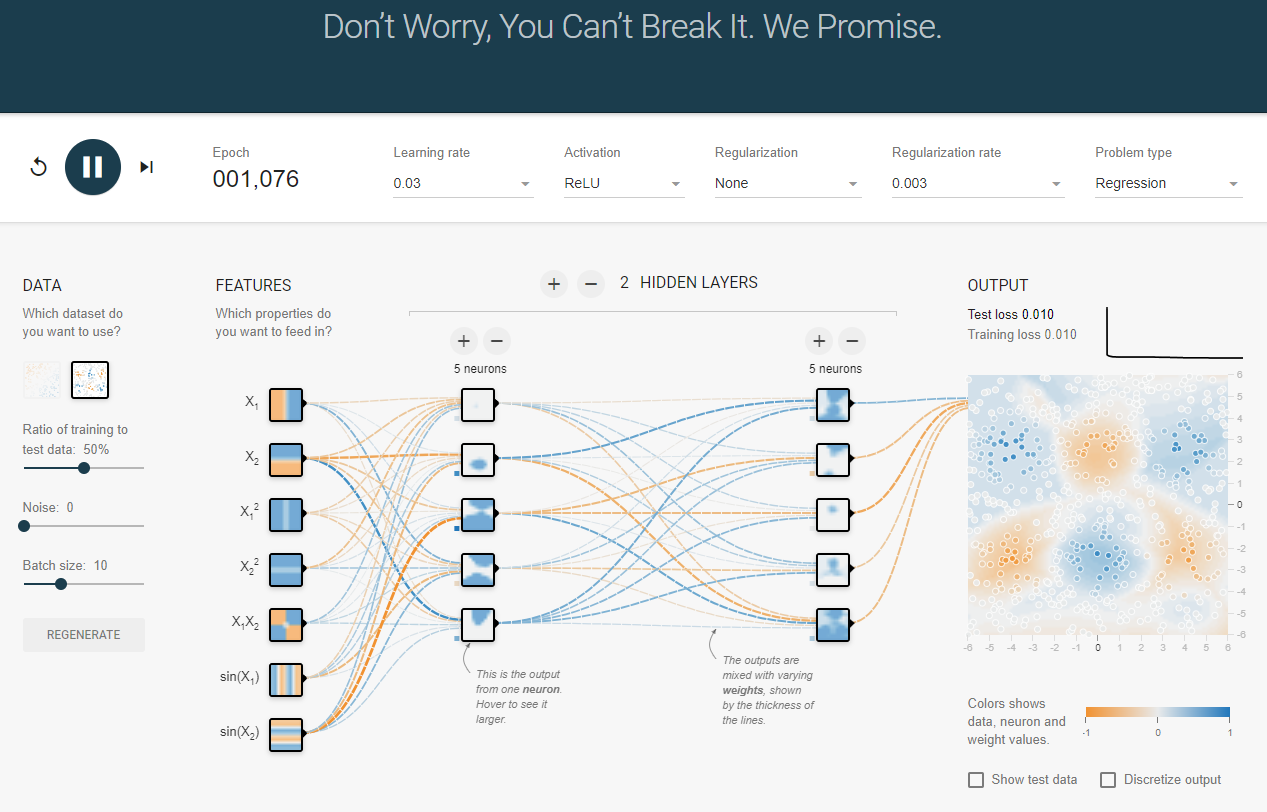

# Let's start by using SciKitLearn

## Key Advantages of `MLPRegressor` in Scikit-learn over Alternatives

1. **Simplicity**: `MLPRegressor` is easy to use and requires minimal setup compared to deep learning frameworks, making it ideal for quick prototyping and small datasets.

2. **Integrated with Scikit-learn**: It seamlessly integrates with Scikit-learn’s ecosystem, allowing for easy use with other tools like `Pipeline`, `GridSearchCV`, and `cross_val_score`.

3. **Automatic Preprocessing**: Features like automatic scaling of inputs and options for early stopping simplify model tuning without needing manual intervention.

4. **Predefined Solvers**: It includes built-in optimizers like Adam and LBFGS, eliminating the need for complex custom configurations.

5. **Lightweight**: `MLPRegressor` is computationally lighter and well-suited for small to medium-sized problems where deep learning frameworks would be ove#rkill.

## Shortcomings of `MLPRegressor`

- Limited to CPU computation (no GPU support).
- No control over network architecture (only supports feedforward networks).
- Lacks flexibility for custom loss functions or activation functions.
- Not ideal for very large datasets or complex tasks.
- Slower performance and less optimization control compared to deep learning frameworks.


For more information on the MLPRegressor implementation in Scikit-learn, please see https://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPRegressor.html

# Load data from previous notebook

In [5]:
import pickle
import pandas as pd

path = './'+'CompoundDataFuncsFingerprints.parquet'

df=pd.read_parquet(path)
df=df.dropna().reset_index(drop=True)

# *GOAL: establish model to predict boiling point given structure features, e.g. molecular weight*

# Plot data to visualize ranges

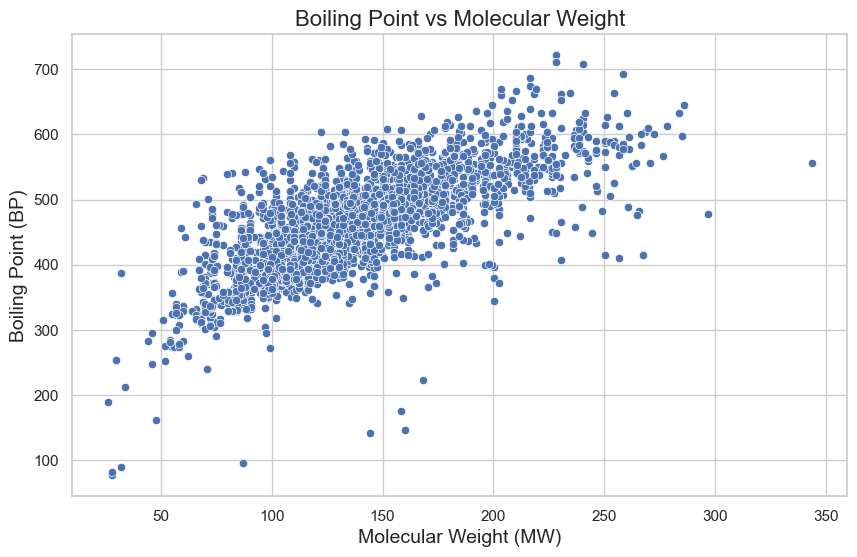

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn styles are applied
sns.set(style="whitegrid")

# Filter the CompoundData to exclude rows with missing values in 'BP' or 'MW'
filtered_data = df.dropna(subset=['BP', 'MW'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MW', y='BP', data=filtered_data)

# Add titles and labels
plt.title('Boiling Point vs Molecular Weight', fontsize=16)
plt.xlabel('Molecular Weight (MW)', fontsize=14)
plt.ylabel('Boiling Point (BP)', fontsize=14)

# Show the plot
plt.show()


# Learning Goals
1. **Saturation, Scaling, Weights, and Activation Function**  
   - Ensure input features are scaled properly (e.g., normalization or standardization).  
   - Initialize weights and choose an appropriate activation function (e.g., ReLU, sigmoid).
2. **Model Complexity**  
   - Start with a simple model like linear regression.  
   - Gradually increase complexity by adding layers and neurons as needed.
3. **Error vs. Epoch and Learning Rate**  
   - Monitor error across epochs to evaluate convergence.  
   - Adjust the learning rate to optimize training performance.

# MW -> BP, Linear Regressor in ScikitLearn

In [8]:
#First let's start with a linear regressor to try to predict boiling point just from molecular weight
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(), max_iter=100000, random_state=42, activation='tanh')

In [9]:
list(df.keys())[1]

'MW'

Mean Squared Error: 2600.3756684864607


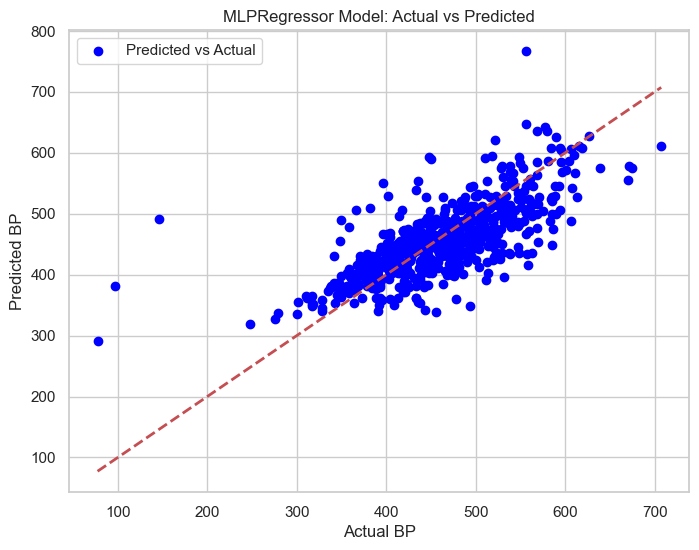

In [10]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the samples and labels from your existing code
features = {}
features['samples'] = [list(df.keys())[1]]
features["labels"] = ['BP']

# Prepare samples DataFrame
samples = {}
for feature in features["samples"]:
    samples[feature] = df[feature]
samples = pd.DataFrame(samples)

# Prepare labels DataFrame
labels = {}
for feature in features["labels"]:
    labels[feature] = df[feature]
labels = pd.DataFrame(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.2, random_state=42,)

# Initialize and train the MLP Regressor model
mlp = MLPRegressor(hidden_layer_sizes=(), max_iter=100000, random_state=42, activation='tanh')
mlp.fit(X_train, y_train.values.ravel())

# Predict on the test data
y_pred = mlp.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('MLPRegressor Model: Actual vs Predicted')
plt.legend()
plt.show()

In [11]:
#Now let's add more neurons:

# MW->BP, One hidden layer, 100 neurons, SciKitLearn, tanh, No Scaling

Mean Squared Error: 2473.346745209547


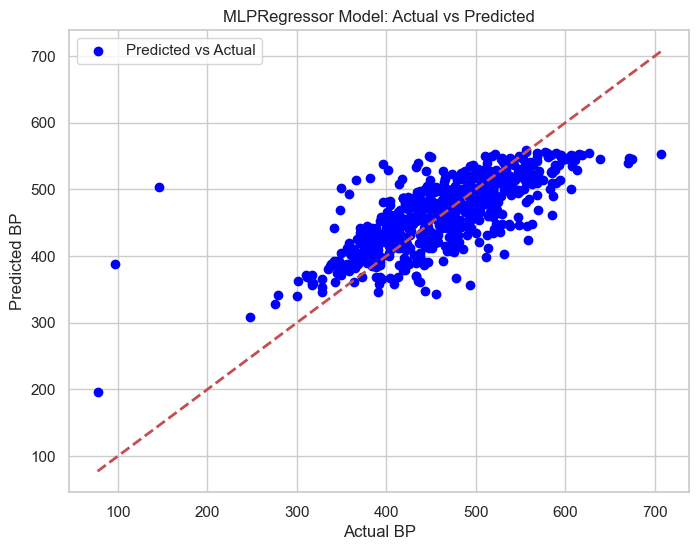

In [12]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the samples and labels from your existing code
features = {}
features['samples'] = [list(df.keys())[1]]
features["labels"] = ['BP']

# Prepare samples DataFrame
samples = {}
for feature in features["samples"]:
    samples[feature] = df[feature]
samples = pd.DataFrame(samples)

# Prepare labels DataFrame
labels = {}
for feature in features["labels"]:
    labels[feature] = df[feature]
labels = pd.DataFrame(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.2, random_state=42,)

# Initialize and train the MLP Regressor model
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=100000, random_state=42, activation='tanh')
mlp.fit(X_train, y_train.values.ravel())

# Predict on the test data
y_pred = mlp.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('MLPRegressor Model: Actual vs Predicted')
plt.legend()
plt.show()

Notice how the predicted output seems to saturate at ~550 in the above. This is because of the tanh activation function. Using the below code, adjust the "amplication_factor" to change initial weights on the activation function and observe how the predictions quickly saturate. This is because of the tanh function.

# Examine Activation Function

In [13]:
# Predict on a single sample
import numpy as np
single_sample = np.array([[samples['MW'][100]]])  # Reshape into 2D array
y_pred = mlp.predict(single_sample)
print(f"Predicted value: {y_pred}")

# Extract outputs of the hidden layer
from sklearn.utils.extmath import safe_sparse_dot

def get_hidden_layer_outputs(mlp, X):
    """Retrieve hidden layer outputs for a given MLP model and data."""
    activation = np.tanh  # Assuming 'tanh' activation for hidden layer
    hidden_weights = mlp.coefs_[0]  # Weights for input to hidden layer
    hidden_biases = mlp.intercepts_[0]  # Biases for hidden layer
    hidden_layer_outputs = activation(safe_sparse_dot(X, hidden_weights) + hidden_biases)
    return hidden_layer_outputs

# Get hidden layer outputs for the single sample
hidden_layer_outputs = get_hidden_layer_outputs(mlp, single_sample)
print(f"Hidden layer size {hidden_layer_outputs.size}")


Predicted value: [489.80528647]
Hidden layer size 100


C:\Users\mjym8d\AppData\Local\miniconda3\envs\ci\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [14]:
import matplotlib.pyplot as plt
import numpy as np

index1 = labels[labels['BP'] >= 350].index[0]  # Get the first index where BP is 550

# Predict on a single sample
single_sample = np.array([[samples['MW'][index1]]])  # Reshape into 2D array
y_pred = mlp.predict(single_sample)
print(f"Predicted value: {y_pred}")

# Extract outputs of the hidden layer
from sklearn.utils.extmath import safe_sparse_dot

def get_hidden_layer_outputs(mlp, X):
    """Retrieve hidden layer outputs for a given MLP model and data."""
    activation = np.tanh  # Assuming 'tanh' activation for hidden layer
    hidden_weights = mlp.coefs_[0]  # Weights for input to hidden layer
    hidden_biases = mlp.intercepts_[0]  # Biases for hidden layer
    hidden_layer_outputs = activation(safe_sparse_dot(X, hidden_weights) + hidden_biases)
    return hidden_layer_outputs

# Get hidden layer outputs for the single sample
hidden_layer_outputs1 = get_hidden_layer_outputs(mlp, single_sample)

Predicted value: [461.99869465]


C:\Users\mjym8d\AppData\Local\miniconda3\envs\ci\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


C:\Users\mjym8d\AppData\Local\miniconda3\envs\ci\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


Predicted value: [552.61335419]


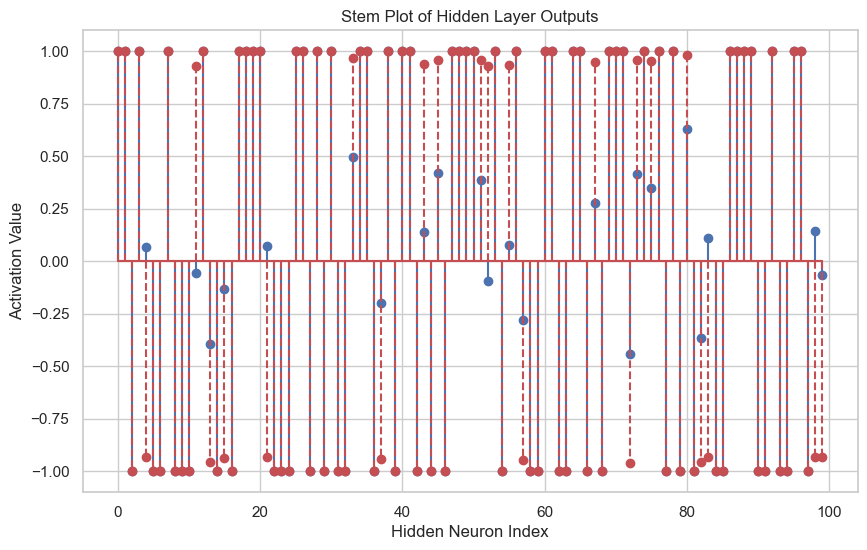

In [15]:
import matplotlib.pyplot as plt
import numpy as np


index2 = labels[labels['BP'] >= 650].index[1]  # Get the first index where BP is 550

# Predict on a single sample
single_sample = np.array([[samples['MW'][index2]]])  # Reshape into 2D array
y_pred = mlp.predict(single_sample)
print(f"Predicted value: {y_pred}")

# Extract outputs of the hidden layer
from sklearn.utils.extmath import safe_sparse_dot

def get_hidden_layer_outputs(mlp, X):
    """Retrieve hidden layer outputs for a given MLP model and data."""
    activation = np.tanh  # Assuming 'tanh' activation for hidden layer
    hidden_weights = mlp.coefs_[0]  # Weights for input to hidden layer
    hidden_biases = mlp.intercepts_[0]  # Biases for hidden layer
    hidden_layer_outputs = activation(safe_sparse_dot(X, hidden_weights) + hidden_biases)
    return hidden_layer_outputs

# Get hidden layer outputs for the single sample
hidden_layer_outputs2 = get_hidden_layer_outputs(mlp, single_sample)

# Create a stem plot for the hidden layer outputs
plt.figure(figsize=(10, 6))
indices = np.arange(hidden_layer_outputs1.size)  # Create indices for each weight
plt.stem(indices, hidden_layer_outputs1.flatten())  # Flatten in case of multidimensional array
plt.stem(indices, hidden_layer_outputs2.flatten(), linefmt='r--')  # Flatten in case of multidimensional array
plt.title('Stem Plot of Hidden Layer Outputs')
plt.xlabel('Hidden Neuron Index')
plt.ylabel('Activation Value')
plt.grid(True)
plt.show()


In [16]:
print(hidden_layer_outputs.size)

100


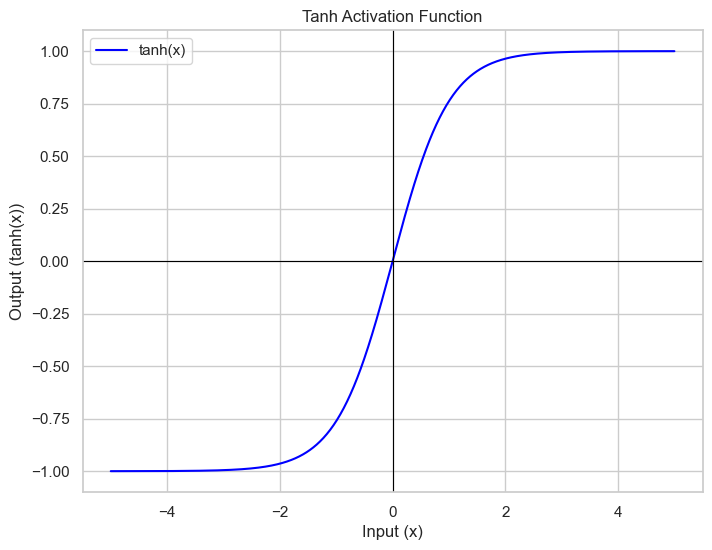

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of input values
x = np.linspace(-5, 5, 1000)

# Calculate the tanh values
y = np.tanh(x)

# Plot the tanh function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='tanh(x)', color='blue')
plt.title('Tanh Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (tanh(x))')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.legend()
plt.show()

# Weight initialization in SciKitLearn

C:\Users\mjym8d\AppData\Local\miniconda3\envs\ci\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mjym8d\AppData\Local\miniconda3\envs\ci\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjym8d\AppData\Local\miniconda3\envs\ci\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 2521.0163369324846


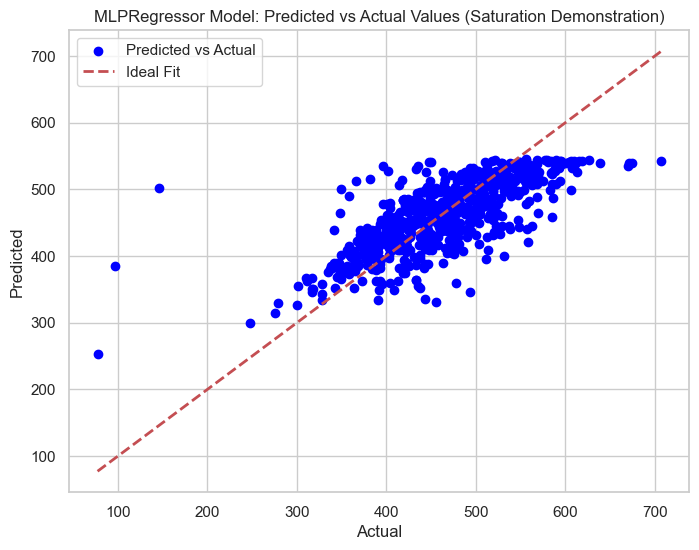

In [19]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Prepare the samples and labels from your existing code
features = {}
features['samples'] = [list(df.keys())[1]]
features["labels"] = ['BP']

# Prepare samples DataFrame
samples = {}
for feature in features["samples"]:
    samples[feature] = df[feature]
samples = pd.DataFrame(samples)

# Prepare labels DataFrame
labels = {}
for feature in features["labels"]:
    labels[feature] = df[feature]
labels = pd.DataFrame(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.2, random_state=42,)

# Initialize the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1, random_state=42, activation='tanh', warm_start=True)

# Perform an initial fit to generate weights
mlp.fit(X_train, y_train)

# Access and modify weights to force saturation
# Note: This is a low-level modification and not recommended for production use
weights = mlp.coefs_
biases = mlp.intercepts_

# Example: Multiply weights by a large factor to induce large inputs to tanh
amplification_factor = 100  # This will push neurons toward saturation, change to values of 100 and 1000 and observe what happens
mlp.coefs_ = [amplification_factor * w for w in weights]
mlp.intercepts_ = biases  # You can also modify biases if needed

# Continue training
mlp.max_iter = 10000  # Set the desired number of iterations
mlp.fit(X_train, y_train)

# Predictions and plotting
y_pred = mlp.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('MLPRegressor Model: Predicted vs Actual Values (Saturation Demonstration)')
plt.legend()
plt.show()


### Weight Initialization Techniques for Neural Networks in scikit-learn

#### Xavier/Glorot Initialization (for `tanh` Activation)

When using activation functions such as `tanh`, scikit-learn employs a form of **Xavier/Glorot initialization**. This method scales the initial weights based on the number of input and output neurons, maintaining the variance of activations throughout the network. This helps improve training stability by preventing gradients from vanishing or exploding. 

The weights are initialized using values drawn from a uniform distribution within the range:

$$
W \sim \text{Uniform} \left(-\sqrt{\frac{6}{n_{\text{input}} + n_{\text{output}}}}, \sqrt{\frac{6}{n_{\text{input}} + n_{\text{output}}}} \right)
$$

This approach works particularly well for activation functions like `tanh` and `sigmoid` in scikit-learn since it helps maintain input variance across layers, reducing saturation issues early in training.

#### He Initialization (for `ReLU` Activation)

For activation functions such as `relu` or its variants, scikit-learn utilizes **He initialization**. This method is similar to Xavier initialization but is specifically designed to address the behavior of ReLU, mitigating issues like the "dying ReLU" problem by using a distribution tailored for positive-only activation outputs.


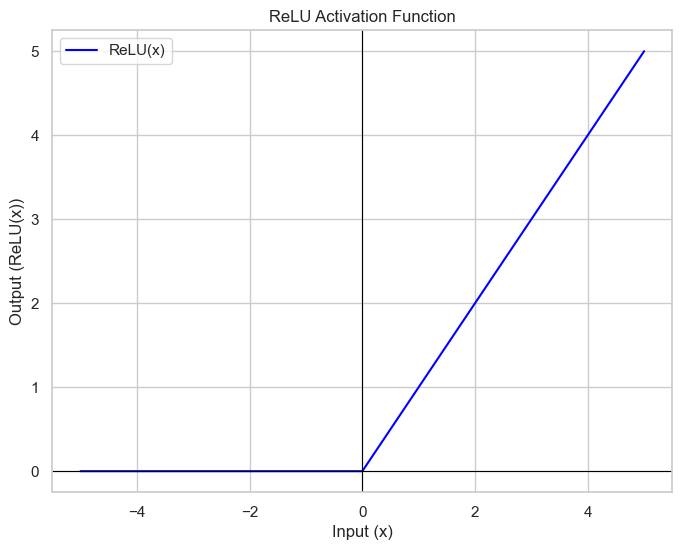

In [20]:
#Note that ReLu doesn't saturate
import numpy as np
import matplotlib.pyplot as plt

# Define the range of input values
x = np.linspace(-5, 5, 1000)

# Calculate the ReLU values
y = np.maximum(0, x)

# Plot the ReLU function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='ReLU(x)', color='blue')
plt.title('ReLU Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (ReLU(x))')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.legend()
plt.show()


# MW->BP, One hidden layer, 100 neurons, ReLU, No Scaling

Mean Squared Error: 2593.6298638710296


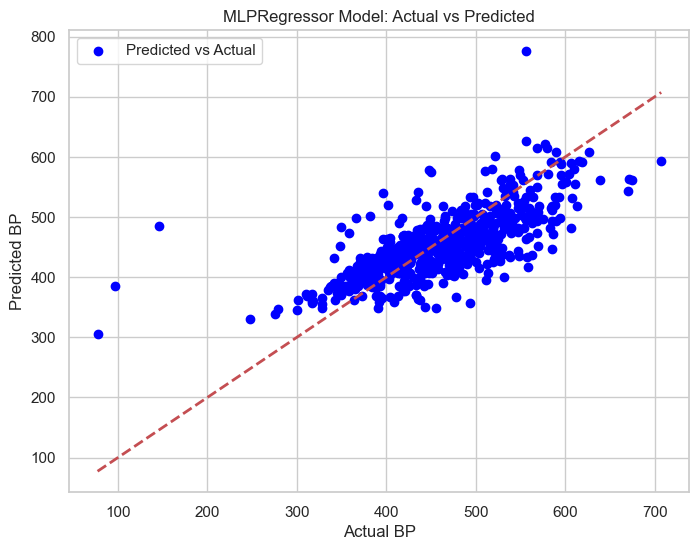

In [21]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare the samples and labels from your existing code
features = {}
features['samples'] = [list(df.keys())[1]]
features["labels"] = ['BP']

# Prepare samples DataFrame
samples = {}
for feature in features["samples"]:
    samples[feature] = df[feature]
samples = pd.DataFrame(samples)

# Prepare labels DataFrame
labels = {}
for feature in features["labels"]:
    labels[feature] = df[feature]
labels = pd.DataFrame(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.2, random_state=42,)

# Initialize and train the MLP Regressor model
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=100000, random_state=42, activation='relu')
mlp.fit(X_train, y_train.values.ravel())

# Predict on the test data
y_pred = mlp.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('MLPRegressor Model: Actual vs Predicted')
plt.legend()
plt.show()

# Reload dataset to facilitate reinitializing the kernel

In [27]:
import pickle
import pandas as pd

path = './'+'CompoundDataFuncsFingerprints.parquet'

df=pd.read_parquet(path)
df=df.dropna().reset_index(drop=True)

# Chemical Fingerprint->BP, One hidden layer, 100 neurons, ReLU, No Scaling

In [22]:
[list(df.keys())[-1]]

['Fingerprint']

In [23]:
df.keys()

Index(['CAS', 'MW', 'BP', 'SMILES', 'mol3D', 'Allenic', 'Vinylic', 'Arene',
       'Alcohol', 'Ether', 'Amine', 'Imine', 'Nitrile', 'Thiol', 'Sulfide',
       'Disulfide', 'Aldehyde', 'Ketone', 'CarboxylAcid', 'Ester', 'Thioester',
       'Amide', 'AcidChloride', 'Anhydride', 'Errors', 'CripA', 'CripB',
       'PartialCharge', 'Fingerprint'],
      dtype='object')

In [24]:
len(df['Fingerprint'][0])

2048

In [25]:
## SUGGESTIONS FOR ADDITIONS
#Make an analysis of statistics on the fingerprint
#Adjust weights on input fingerprint

In [28]:
#Now let's examine using the chemical fingerprint as the chemical feature instead of the molecular weight

In [29]:
list(df.keys())[-1]

'Fingerprint'

C:\Users\mjym8d\AppData\Local\miniconda3\envs\ci\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 8576.110994260816


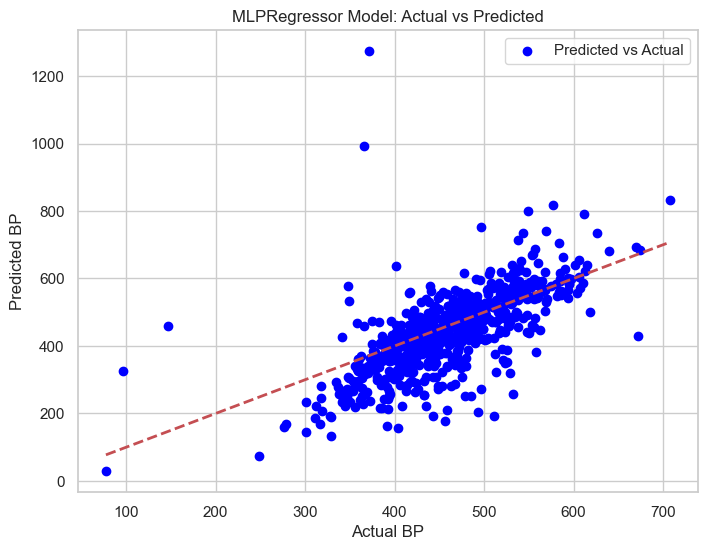

In [30]:
#If you run max_iter=100, it takes ~30 seconds, but the prediction is poor.
#If you run max_iter=1000, it takes ~300 seconds.
#If you run max_iter=10000, it will take ~3000 seconds... 
#gosh, I wish we could see what were happening as it's running to know if we are wasting time (foreshadowing...)

import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm  # Use tqdm.notebook for Jupyter

# Prepare the samples and labels from your existing code
features = {}
features['samples'] = [list(df.keys())[-1]]  # Wrap it in a list so we can iterate over it later
features["labels"] = ['BP']

# Unroll the array in list(df.keys())[-1] into separate columns
# Assuming that df[features['samples'][0]] is the array you want to flatten
unrolled_array = pd.DataFrame(df[features['samples'][0]].tolist(), columns=[f'Feature_{i+1}' for i in range(len(df[features['samples'][0]][0]))])

# Prepare the samples DataFrame using the unrolled array
samples = unrolled_array

# Prepare labels DataFrame
labels = {}
for feature in features["labels"]:
    labels[feature] = df[feature]
labels = pd.DataFrame(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.2, random_state=42)

# Initialize the MLP Regressor model with progress monitoring via 'warm_start'
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=100, warm_start=True, random_state=42)

mlp.fit(X_train, y_train.values.ravel())

# Predict on the test data
y_pred = mlp.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('MLPRegressor Model: Actual vs Predicted')
plt.legend()
plt.show()

# Chemical Fingerprint->BP, One hidden layer, 100 neurons, ReLU, With Scaling

In [31]:
#What happens when we scale the inputs and outputs
#Converges a lot faster
#10000 iterations, converges in <10 seconds

#Standard practice is to save data every N epochs - can't do this with scikitlearn

Mean Squared Error: 6093.823005845621


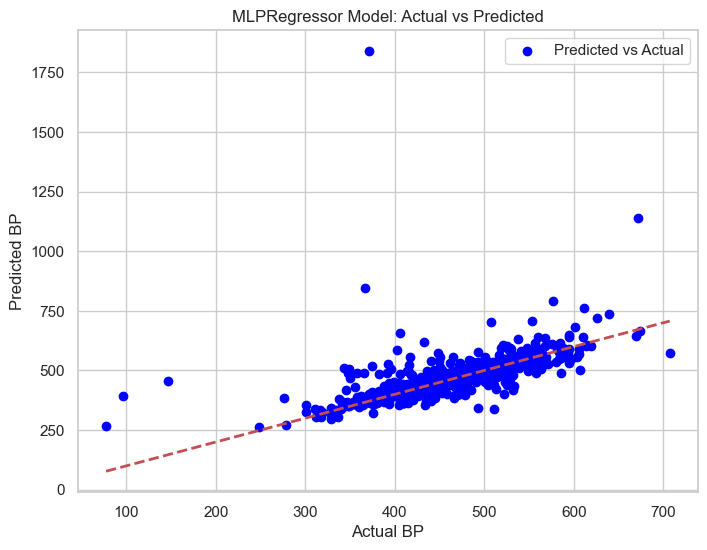

In [32]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm  # Use tqdm.notebook for Jupyter

# Prepare the samples and labels from your existing code
features = {}
features['samples'] = [list(df.keys())[-1]]  # Wrap it in a list so we can iterate over it later
features["labels"] = ['BP']

# Unroll the array in list(df.keys())[-1] into separate columns
# Assuming that df[features['samples'][0]] is the array you want to flatten
unrolled_array = pd.DataFrame(df[features['samples'][0]].tolist(), columns=[f'Feature_{i+1}' for i in range(len(df[features['samples'][0]][0]))])

# Prepare the samples DataFrame using the unrolled array
samples = unrolled_array

# Prepare labels DataFrame
labels = {}
for feature in features["labels"]:
    labels[feature] = df[feature]
labels = pd.DataFrame(labels)

# Initialize scalers for both features and labels
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.2, random_state=42)

# Fit the scalers to the training data and transform both the features and labels
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Initialize the MLP Regressor model with progress monitoring via 'warm_start'
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=10000, warm_start=True, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train_scaled.ravel())

# Predict on the test data
y_pred_scaled = mlp.predict(X_test_scaled)

# Inverse transform the scaled predictions and the test labels back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Calculate Mean Squared Error on the original scale
mse = mean_squared_error(y_test_original, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('MLPRegressor Model: Actual vs Predicted')
plt.legend()
plt.show()


In [33]:
#Still some outliers, what if we make the net deeper:

# Chemical Fingerprint->BP, One hidden layer, 64|32|16|32 neurons, ReLU, With Scaling

Mean Squared Error: 1243.7380959004793


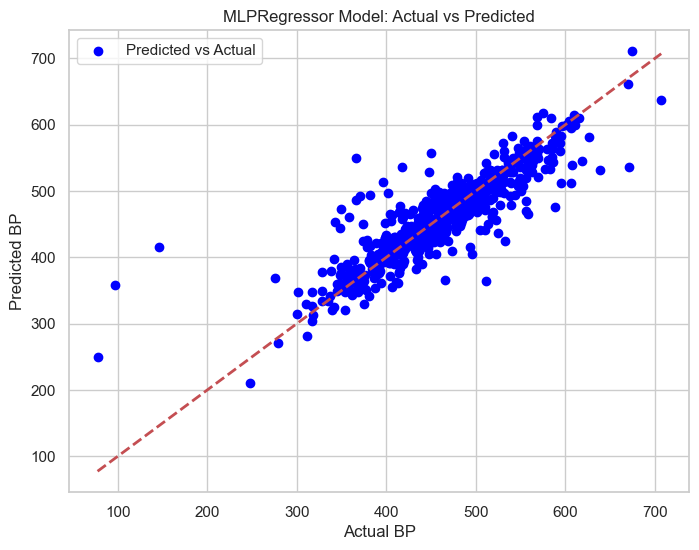

In [36]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm  # Use tqdm.notebook for Jupyter

# Prepare the samples and labels from your existing code
features = {}
features['samples'] = [list(df.keys())[-1]]  # Wrap it in a list so we can iterate over it later
features["labels"] = ['BP']

# Unroll the array in list(df.keys())[-1] into separate columns
# Assuming that df[features['samples'][0]] is the array you want to flatten
unrolled_array = pd.DataFrame(df[features['samples'][0]].tolist(), columns=[f'Feature_{i+1}' for i in range(len(df[features['samples'][0]][0]))])

# Prepare the samples DataFrame using the unrolled array
samples = unrolled_array

# Prepare labels DataFrame
labels = {}
for feature in features["labels"]:
    labels[feature] = df[feature]
labels = pd.DataFrame(labels)

# Initialize scalers for both features and labels
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.2, random_state=42)

# Fit the scalers to the training data and transform both the features and labels
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Initialize the MLP Regressor model with progress monitoring via 'warm_start'
mlp = MLPRegressor(hidden_layer_sizes=(64,32,16,32), max_iter=10000, warm_start=True, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train_scaled.ravel())

# Predict on the test data
y_pred_scaled = mlp.predict(X_test_scaled)

# Inverse transform the scaled predictions and the test labels back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Calculate Mean Squared Error on the original scale
mse = mean_squared_error(y_test_original, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('MLPRegressor Model: Actual vs Predicted')
plt.legend()
plt.show()


# Pytorch

## Key Advantages of PyTorch over `MLPRegressor` in Scikit-learn

1. **Batch & Epoch Control**: PyTorch provides control over mini-batch training and learning rate schedules (https://pytorch.org/docs/stable/optim.html), which is not possible in `MLPRegressor`.gressor`.

2. **Custom Loss & Optimizers**: PyTorch enables custom loss functions and optimizers like Adam or RMSProp, whereas `MLPRegressor` is restricted to predefined options.

3. **Custom Architectures**: PyTorch allows building flexible, custom neural networks, while `MLPRegressor` is limited to basic feedforward networks. PyTorch can do both established custom networks (CNNs, RNNs, GNNs, etc.) but also allows for full customization of "new" networks.
   
4. **Autograd**: PyTorch provides automatic differentiation for custom gradient calculations (critical for fully customized networks), which `MLPRegressor` does not offer.

5. **GPU Support**: PyTorch supports GPU acceleration for faster training, while `MLPRegressor` only supports CPU computation.


Also, you can use Tensorboard: https://www.tensorflow.org/tensorboard

#comment this line and run to install tensorboard
%pip install tensorboard

### Top Five Most Useful Ways TensorBoard Can Help You

1. **Recording Numerical Statistics**: Visualizes metrics like MSELoss, training error, and validation loss to track model performance and ensure you’re not overfitting or underfitting.

2. **Storing and Visualizing Data**: Logs and displays your actual data (e.g., images or spectral data) alongside predictions to assess prediction quality over epochs and understand model behavior.

3. **Plotting Hyperparameters**: Tracks and visualizes changes in hyperparameters, such as input neurons, over epochs to aid in debugging and refining model architecture.

4. **Understanding the Model Graph**: Displays the computational graph, helping you comprehend complex architectures, debug issues, and optimize data flow.

5. **Monitoring Weights and Biases**: Visualizes distributions of model weights and biases, making it easier to detect problems like vanishing or exploding gradients.

### Go to the end of this worksheet and turn on tensorboard so you can see what's happening

# Pytorch Example Code

## Reload dataset to facilitate reinitializing kernel

In [48]:
import pickle
import pandas as pd

path = './'+'CompoundDataFuncsFingerprints.parquet'

df=pd.read_parquet(path)
df=df.dropna().reset_index(drop=True)

## Chemical Fingerprint->BP, 64|32|16|32 neurons, ReLU, With Scaling, Learning Rate Scheduler

Epoch [100/5000], Loss: 1005.6812, Val Loss: 1057.2831, LR: 0.000010
Epoch [200/5000], Loss: 966.3850, Val Loss: 1021.9775, LR: 0.000010
Epoch [300/5000], Loss: 924.7657, Val Loss: 985.0966, LR: 0.000010
Epoch [400/5000], Loss: 880.5906, Val Loss: 946.1484, LR: 0.000010
Epoch [500/5000], Loss: 830.8534, Val Loss: 903.1614, LR: 0.000010
Epoch [600/5000], Loss: 775.3853, Val Loss: 855.9887, LR: 0.000010
Epoch [700/5000], Loss: 716.9130, Val Loss: 807.1000, LR: 0.000010
Epoch [800/5000], Loss: 658.3616, Val Loss: 759.0222, LR: 0.000010
Epoch [900/5000], Loss: 602.6311, Val Loss: 714.5164, LR: 0.000010
Epoch [1000/5000], Loss: 551.4848, Val Loss: 673.8056, LR: 0.000010
Epoch [1100/5000], Loss: 499.7074, Val Loss: 630.6478, LR: 0.000010
Epoch [1200/5000], Loss: 446.2585, Val Loss: 583.8834, LR: 0.000010
Epoch [1300/5000], Loss: 393.9971, Val Loss: 537.6372, LR: 0.000010
Epoch [1400/5000], Loss: 343.2895, Val Loss: 492.3044, LR: 0.000010
Epoch [1500/5000], Loss: 295.3994, Val Loss: 449.1852,

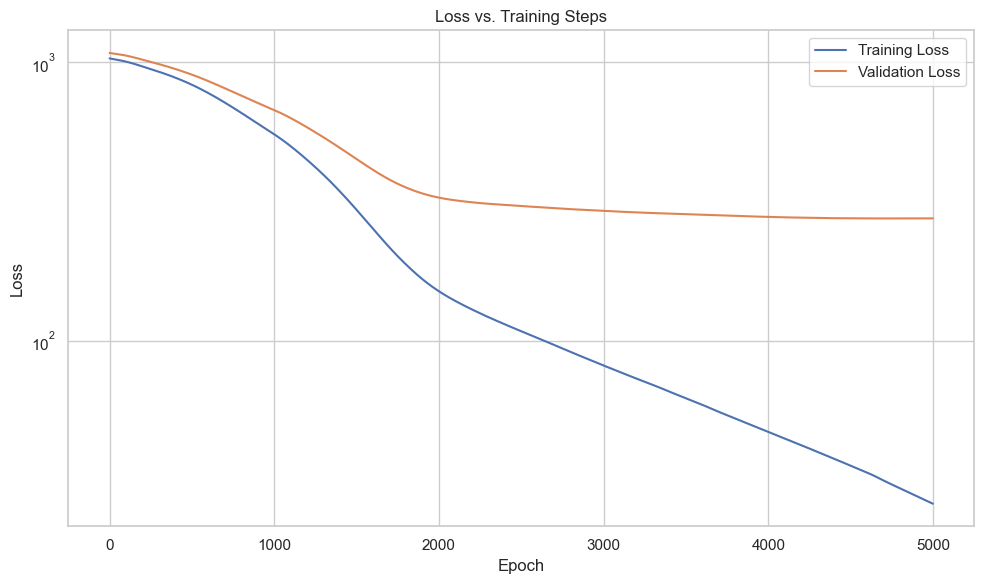

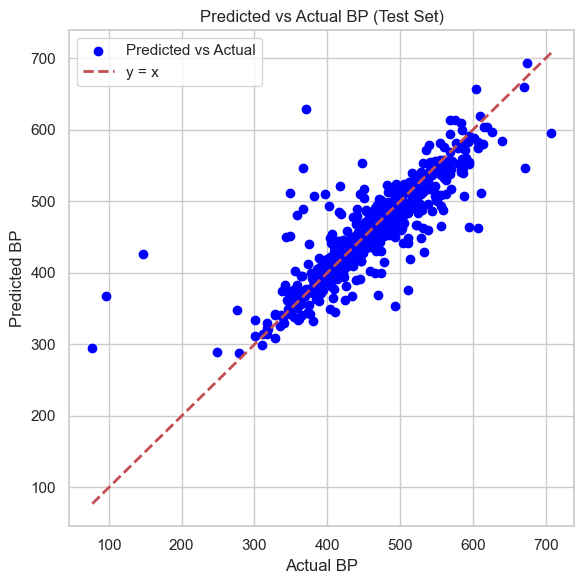

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import StepLR
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

##############################################
# declare the MLP with new architecture
##############################################

class BPMLP(nn.Module):
    def __init__(self, D_in):
        super(BPMLP, self).__init__()
        self.linear1 = nn.Linear(D_in, 64)
        self.linear2 = nn.Linear(64, 32)
        self.linear3 = nn.Linear(32, 16)
        self.linear4 = nn.Linear(16, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = F.relu(self.linear4(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Prepare data (assuming df['Fingerprint'] is a list of vectors and 'BP' is the target)
##############################################

# Assuming df is already prepared and contains 'Fingerprint' and 'BP' columns
fingerprints = np.array(df['Fingerprint'].tolist(), dtype=np.float32)
bp_values = df['BP'].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(fingerprints, bp_values, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()  # Flatten after scaling
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()  # Flatten after scaling

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##############################################
# create an instance and set up optimization
##############################################

D_in = X_train_tensor.shape[1]
net = BPMLP(D_in)

learning_rate = 0.00001  # Track this as a hyperparameter
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

##############################################
# Set up TensorBoard for logging
##############################################

writer = SummaryWriter()
# Log initial hyperparameters
writer.add_text('Hyperparameters', f'Initial Learning Rate: {learning_rate}\nOptimizer: Adam\nScheduler: CosineAnnealingWarmRestarts\nEpochs: 5000')

##############################################
# training
##############################################

num_epochs = 5000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor) * 1000
    loss.backward()
    optimizer.step()
    scheduler.step()

    train_losses.append(loss.item())

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor) * 1000
        val_losses.append(val_loss.item())

    # Log losses to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

    # Track learning rate (for example, for the first parameter group)
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, LR: {current_lr:.6f}')

# Plotting the loss curves and adding them to TensorBoard without saving to a file
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')  # Set y-axis to log scale
plt.title('Loss vs. Training Steps')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Loss Curve', np.array(image), dataformats='HWC')
buf.close()
plt.show()

##############################################
# Evaluate on test data and plot predicted vs actual values
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y = x')
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('Predicted vs Actual BP (Test Set)')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Predicted vs Actual', np.array(image), dataformats='HWC')
buf.close()
plt.show()

writer.close()


You want it to look like this:
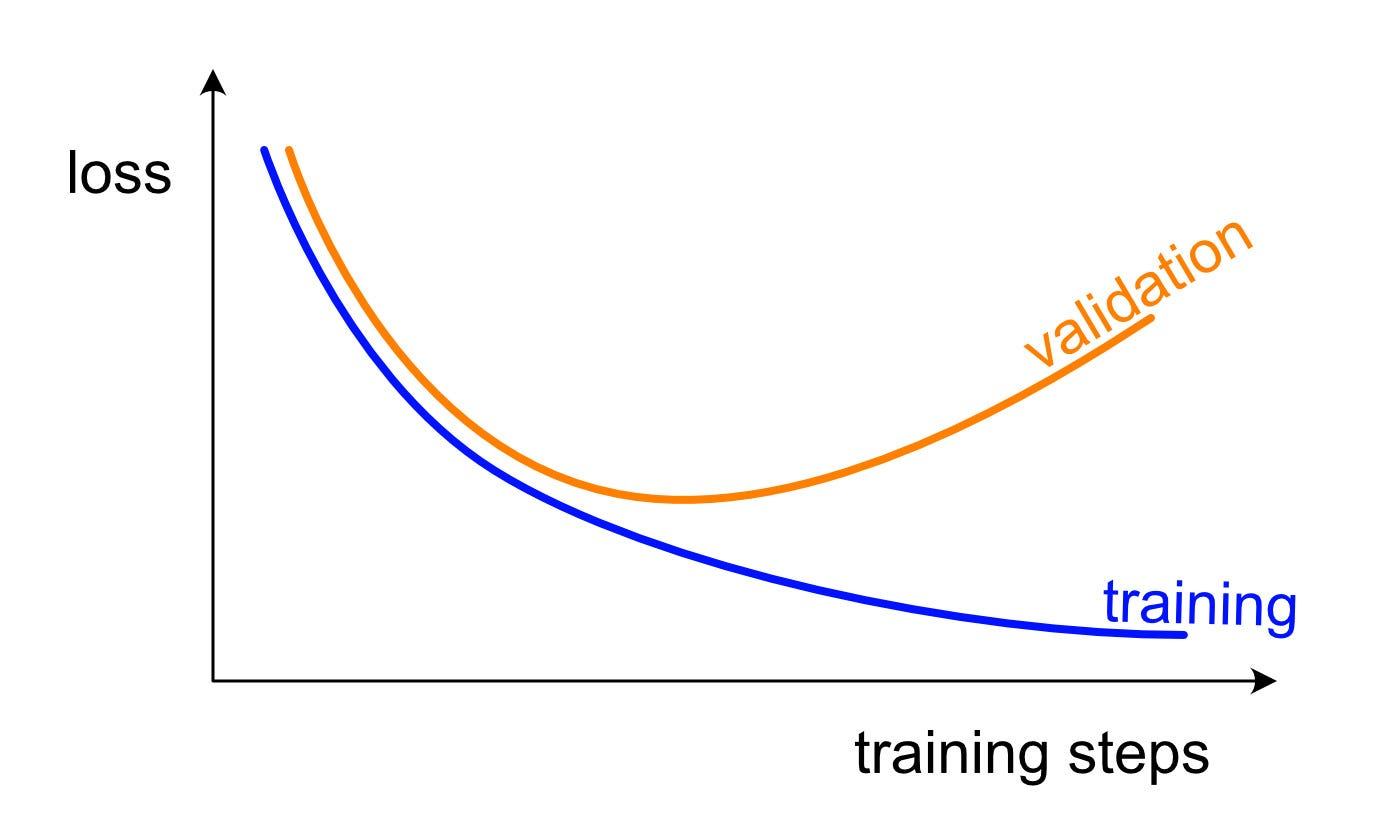

# Class question - how would you modify the below code to perform linear regression?

## Chemical Fingerprint->BP, 64|32 neurons, ReLU, With Scaling, Learning Rate Scheduler

Epoch [100/5000], Loss: 893.6137, Val Loss: 960.9340, LR: 0.000010
Epoch [200/5000], Loss: 779.3436, Val Loss: 864.0889, LR: 0.000010
Epoch [300/5000], Loss: 659.4830, Val Loss: 760.9838, LR: 0.000010
Epoch [400/5000], Loss: 543.9193, Val Loss: 662.2322, LR: 0.000010
Epoch [500/5000], Loss: 442.0183, Val Loss: 574.3390, LR: 0.000010
Epoch [600/5000], Loss: 357.7844, Val Loss: 500.8125, LR: 0.000010
Epoch [700/5000], Loss: 290.9975, Val Loss: 442.2270, LR: 0.000010
Epoch [800/5000], Loss: 239.9542, Val Loss: 397.2205, LR: 0.000010
Epoch [900/5000], Loss: 202.0491, Val Loss: 363.5266, LR: 0.000010
Epoch [1000/5000], Loss: 174.3703, Val Loss: 339.6627, LR: 0.000010
Epoch [1100/5000], Loss: 154.1269, Val Loss: 323.1197, LR: 0.000010
Epoch [1200/5000], Loss: 138.9861, Val Loss: 311.6543, LR: 0.000010
Epoch [1300/5000], Loss: 127.2719, Val Loss: 303.4298, LR: 0.000010
Epoch [1400/5000], Loss: 117.7745, Val Loss: 297.4607, LR: 0.000010
Epoch [1500/5000], Loss: 109.7000, Val Loss: 292.9025, LR

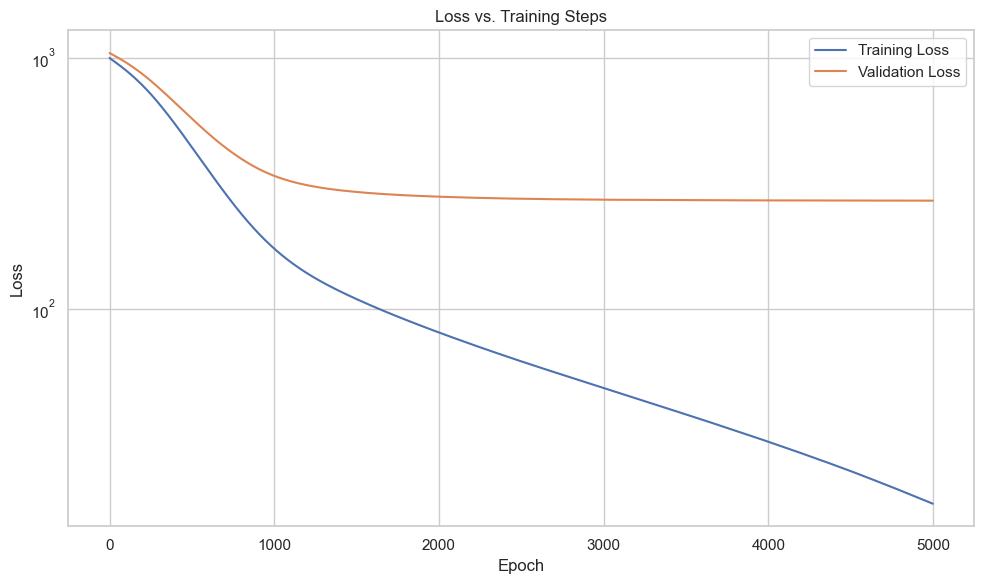

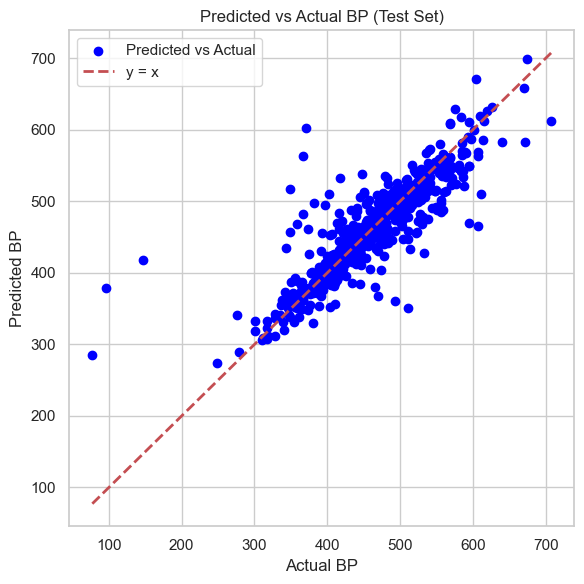

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import StepLR
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

##############################################
# declare the MLP with new architecture
##############################################

class BPMLP(nn.Module):
    def __init__(self, D_in):
        super(BPMLP, self).__init__()
        self.linear1 = nn.Linear(D_in, 64)
        self.linear2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        y_pred = self.output(x)
        return y_pred

##############################################
# Prepare data (assuming df['Fingerprint'] is a list of vectors and 'BP' is the target)
##############################################

# Assuming df is already prepared and contains 'Fingerprint' and 'BP' columns
fingerprints = np.array(df['Fingerprint'].tolist(), dtype=np.float32)
bp_values = df['BP'].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(fingerprints, bp_values, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()  # Flatten after scaling
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()  # Flatten after scaling

# Convert training and testing data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

##############################################
# create an instance and set up optimization
##############################################

D_in = X_train_tensor.shape[1]
net = BPMLP(D_in)

learning_rate = 0.00001  # Track this as a hyperparameter
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=100, T_mult=2, eta_min=1e-5)
criterion = nn.MSELoss()

##############################################
# Set up TensorBoard for logging
##############################################

writer = SummaryWriter()
# Log initial hyperparameters
writer.add_text('Hyperparameters', f'Initial Learning Rate: {learning_rate}\nOptimizer: Adam\nScheduler: CosineAnnealingWarmRestarts\nEpochs: 5000')

##############################################
# training
##############################################

num_epochs = 5000
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(X_train_tensor)
    loss = criterion(outputs, y_train_tensor) * 1000
    loss.backward()
    optimizer.step()
    scheduler.step()

    train_losses.append(loss.item())

    # Validation loss
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor) * 1000
        val_losses.append(val_loss.item())

    # Log losses to TensorBoard
    writer.add_scalar('Loss/train', loss.item(), epoch)
    writer.add_scalar('Loss/validation', val_loss.item(), epoch)

    # Track learning rate (for example, for the first parameter group)
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, epoch)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, LR: {current_lr:.6f}')

# Plotting the loss curves and adding them to TensorBoard without saving to a file
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')  # Set y-axis to log scale
plt.title('Loss vs. Training Steps')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Loss Curve', np.array(image), dataformats='HWC')
buf.close()
plt.show()

##############################################
# Evaluate on test data and plot predicted vs actual values
##############################################

net.eval()
with torch.no_grad():
    y_pred_tensor = net(X_test_tensor)

# Inverse transform the predictions back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_tensor.numpy().flatten().reshape(-1, 1)).flatten()
y_test = scaler_y.inverse_transform(y_test_tensor.numpy().flatten().reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='y = x')
plt.xlabel('Actual BP')
plt.ylabel('Predicted BP')
plt.title('Predicted vs Actual BP (Test Set)')
plt.legend()
plt.tight_layout()

# Save plot directly to TensorBoard
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image = Image.open(buf)
writer.add_image('Predicted vs Actual', np.array(image), dataformats='HWC')
buf.close()
plt.show()

writer.close()


# Examine output for where model works and fails

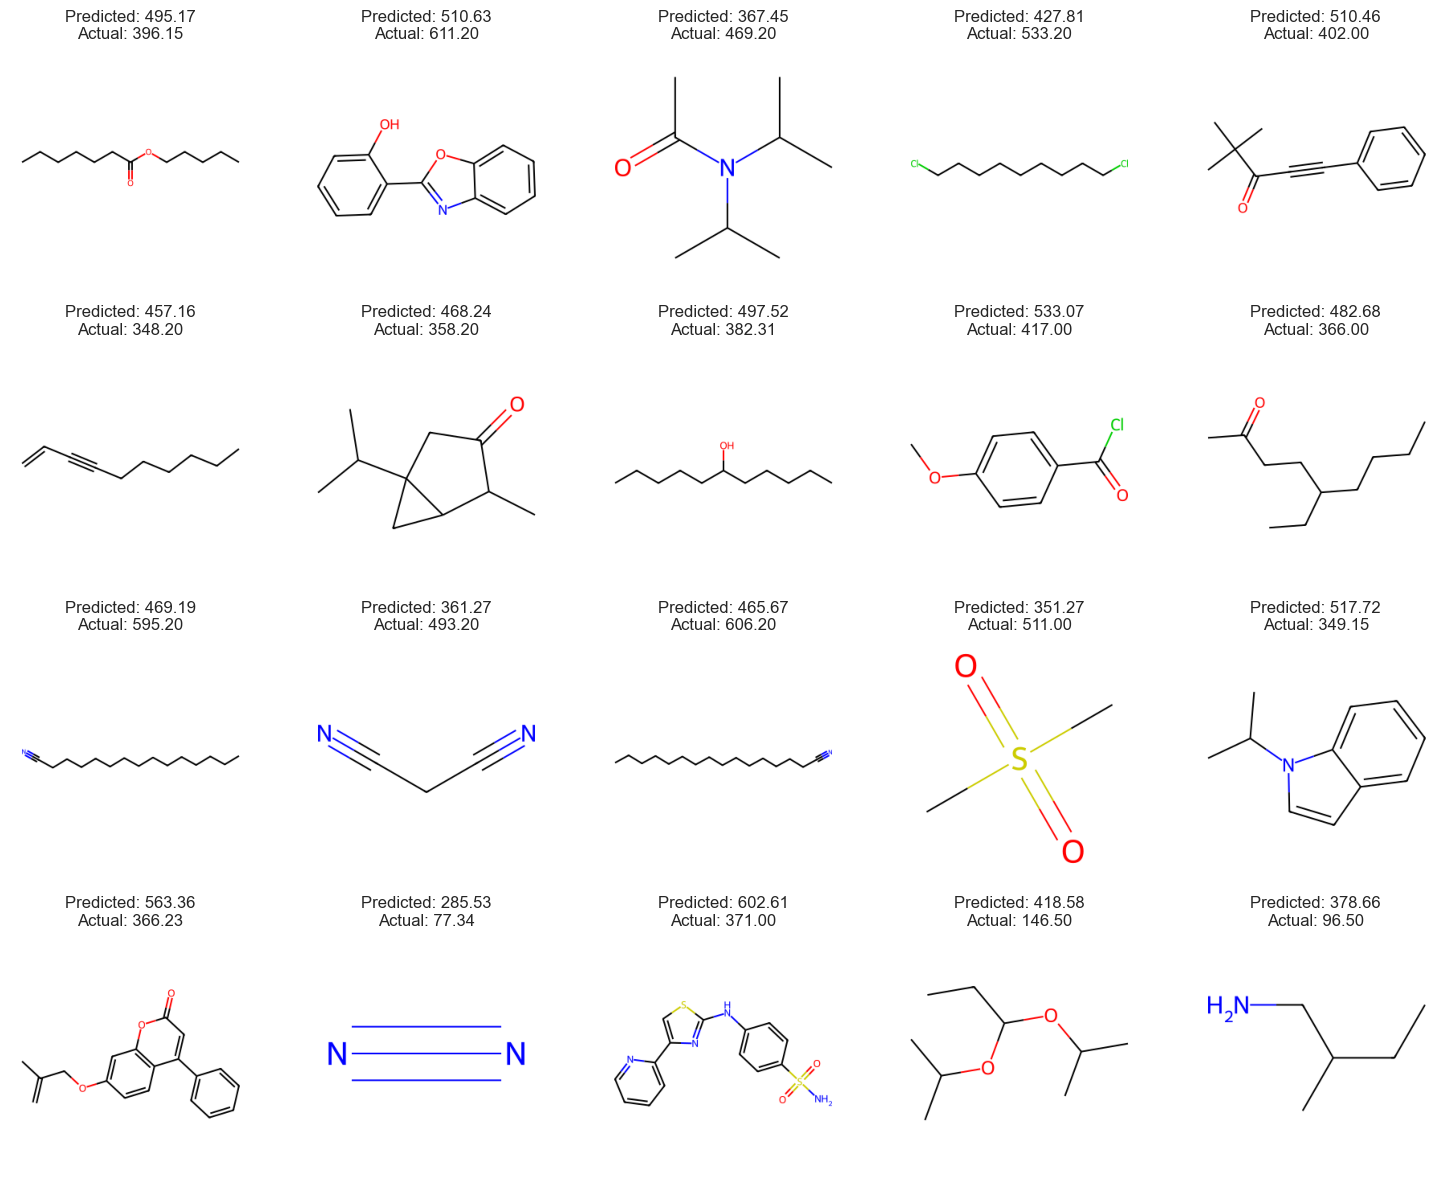

In [40]:
# Get the indices of the original dataframe used for the test set
_, test_indices = train_test_split(range(len(df)), test_size=0.2, random_state=42)

# Calculate absolute errors between predicted and actual values
errors = np.abs(y_test - y_pred)

# Find indices of the top N examples with the highest errors
N = 20  # Number of examples to find
highest_error_indices = np.argsort(errors)[-N:]  # Indices of top N errors in the test set

# Map these indices back to the original dataframe indices
original_df_indices = [test_indices[idx] for idx in highest_error_indices]

from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# Extract SMILES strings and corresponding predicted and actual values for the highest-error indices
high_error_smiles = df.loc[original_df_indices, 'SMILES']
high_error_actual_bp = y_test[highest_error_indices]
high_error_predicted_bp = y_pred[highest_error_indices]

# Convert SMILES strings to RDKit molecule objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in high_error_smiles]

# Create a grid of plots for the molecules
# Set the number of columns for the grid
num_cols = 5
num_rows = (len(molecules) + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

for idx, mol in enumerate(molecules):
    row, col = divmod(idx, num_cols)
    if mol:  # Check if molecule conversion was successful
        img = Draw.MolToImage(mol)
        axes[row, col].imshow(img)
        axes[row, col].axis('off')
        axes[row, col].set_title(f'Predicted: {high_error_predicted_bp[idx]:.2f}\nActual: {high_error_actual_bp[idx]:.2f}')
    else:
        axes[row, col].axis('off')
        axes[row, col].set_title('Invalid SMILES')

# Turn off any unused axes in the grid
for idx in range(len(molecules), num_rows * num_cols):
    row, col = divmod(idx, num_cols)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


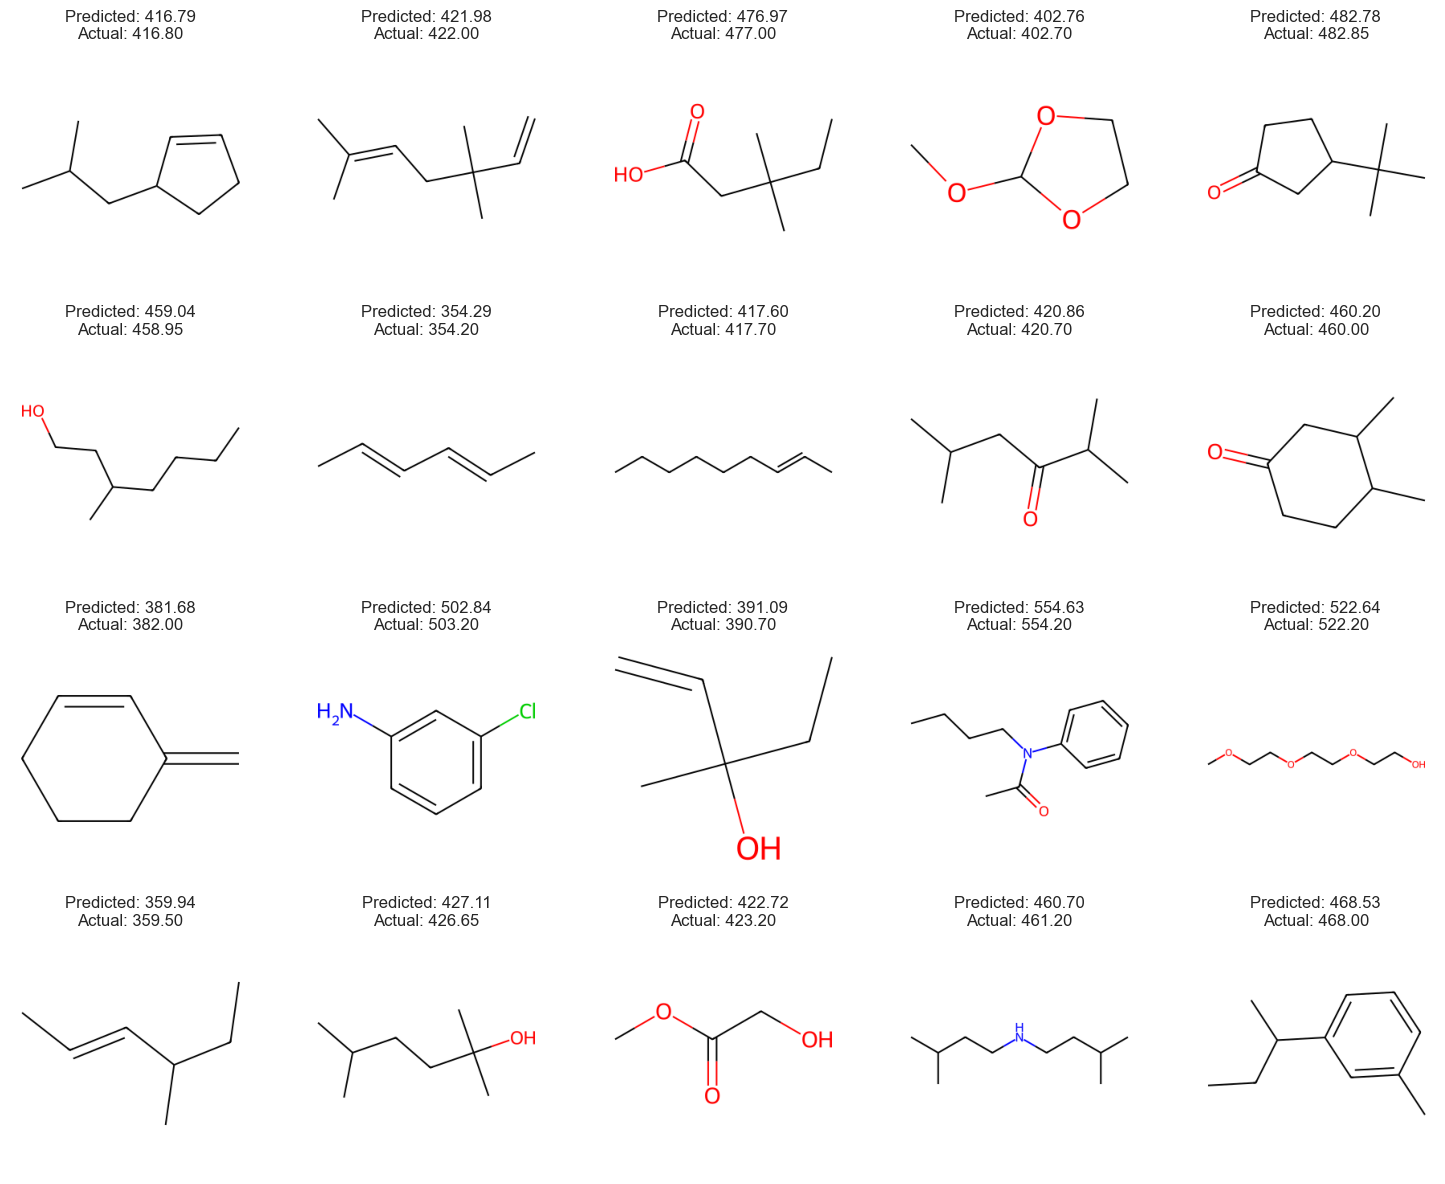

In [41]:
# Get the indices of the original dataframe used for the test set
_, test_indices = train_test_split(range(len(df)), test_size=0.2, random_state=42)

# Calculate absolute errors between predicted and actual values
errors = np.abs(y_test - y_pred)

# Find indices of the top N examples with the lowest errors
N = 20  # Number of examples to find
lowest_error_indices = np.argsort(errors)[:N]  # Indices of top N examples with the lowest errors

# Map these indices back to the original dataframe indices
original_df_indices = [test_indices[idx] for idx in lowest_error_indices]

from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# Extract SMILES strings and corresponding predicted and actual values for the lowest-error indices
low_error_smiles = df.loc[original_df_indices, 'SMILES']
low_error_actual_bp = y_test[lowest_error_indices]
low_error_predicted_bp = y_pred[lowest_error_indices]

# Convert SMILES strings to RDKit molecule objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in low_error_smiles]

# Create a grid of plots for the molecules
# Set the number of columns for the grid
num_cols = 5
num_rows = (len(molecules) + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

for idx, mol in enumerate(molecules):
    row, col = divmod(idx, num_cols)
    if mol:  # Check if molecule conversion was successful
        img = Draw.MolToImage(mol)
        axes[row, col].imshow(img)
        axes[row, col].axis('off')
        axes[row, col].set_title(f'Predicted: {low_error_predicted_bp[idx]:.2f}\nActual: {low_error_actual_bp[idx]:.2f}')
    else:
        axes[row, col].axis('off')
        axes[row, col].set_title('Invalid SMILES')

# Turn off any unused axes in the grid
for idx in range(len(molecules), num_rows * num_cols):
    row, col = divmod(idx, num_cols)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


In [51]:
# Idea to Expand:
# Does it make sense to vary the loss function here?

# Practice - Tinkering with Code

**Explore:**
- **Turn on TensorBoard**
- **Experiment 0**: Run the above code without the scheduler
- **Experiment 1**: Now turn on the scheduler
- **Experiment 2**: Try five different size neural nets (e.g., make them wider or narrower)
- **Experiment 3**: Try different initial learning rates from 10^-6 to 10^-1 - how do different learning rates affect the outcome?
- **Experiment 4**: Explain what loss function you are using and discuss whether changing the loss function (e.g., MSELoss, SSELoss, CrossEntropy) will affect the outcome
- **Experiment 5**: Add the additional features you have at your disposal

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir=runs --host localhost